In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import csv
import random
import seaborn as sns
from scipy.stats import mannwhitneyu

rc("font", **{"family": "Times"})
rc("text", usetex=True)

plt.rcParams['figure.dpi']= 300

def calc_r_squared(y, y_hat):
    y_bar = np.mean(y)
    ss_tot = np.sum((y - y_bar) ** 2)
    ss_res = np.sum((y - y_hat) ** 2)
    return 1 - (ss_res / ss_tot)

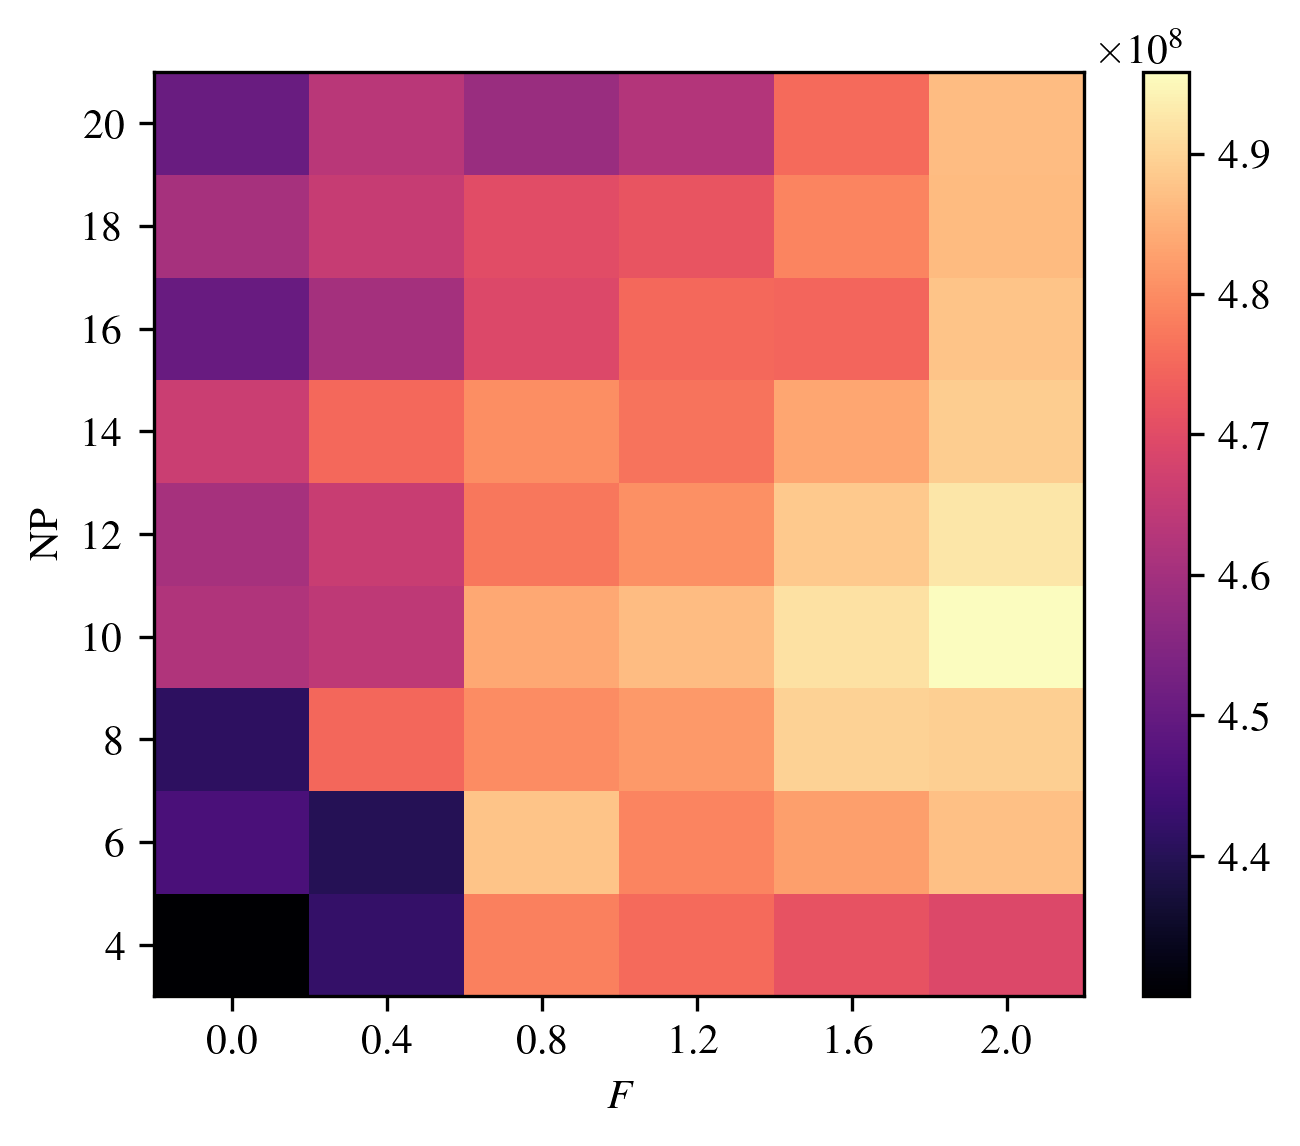

In [3]:
NUM_TRIALS = 10
N_T = 20
DAYS = 50

def plot_profit_grid(k_values, f_values):
    profit = np.array([]).reshape(0, len(f_values))
    for k in k_values:
        profit_row = np.array([])
        for f in f_values:
            f = round(f, 2)
            trial_id = f"k={k},F={f}"
            avg_balance = 0
            for i in range(NUM_TRIALS):
                prices_fname = f"results/prde_homogeneous_nt{N_T}_{DAYS}d/{i + 1}/" + trial_id + '_avg_balance.csv'
                with open(prices_fname, newline='') as csvfile:
                    # print(prices_fname)
                    balance = list(csv.reader(csvfile))[0][6]
                    avg_balance += int(balance)
                    # print(trial_id, balance)
                    # profit_row = np.hstack([profit_row, int(balance)])
            avg_balance /= NUM_TRIALS
            profit_row = np.hstack([profit_row, avg_balance])
        profit = np.vstack([profit, profit_row])

    plt.figure(figsize = (5, 4))
    plt.imshow(profit, cmap = 'magma', origin = "lower", aspect = 'auto')
    global profit_homo
    profit_homo = profit.flatten()
    plt.xlabel("$F$")
    plt.ylabel("$\mathrm{NP}$")
    plt.gca().set_xticks(np.arange(len(f_values)), labels = f_values)
    plt.gca().set_yticks(np.arange(len(k_values)), labels = k_values)
    plt.colorbar()
    plt.savefig(f"figures/profit_grid.png", bbox_inches='tight', pad_inches=0.0)
    plt.show()

k_values = [4, 6, 8, 10, 12, 14, 16, 18, 20]
f_values = [0.0, 0.4, 0.8, 1.2, 1.6, 2.0]

plot_profit_grid(k_values, f_values)

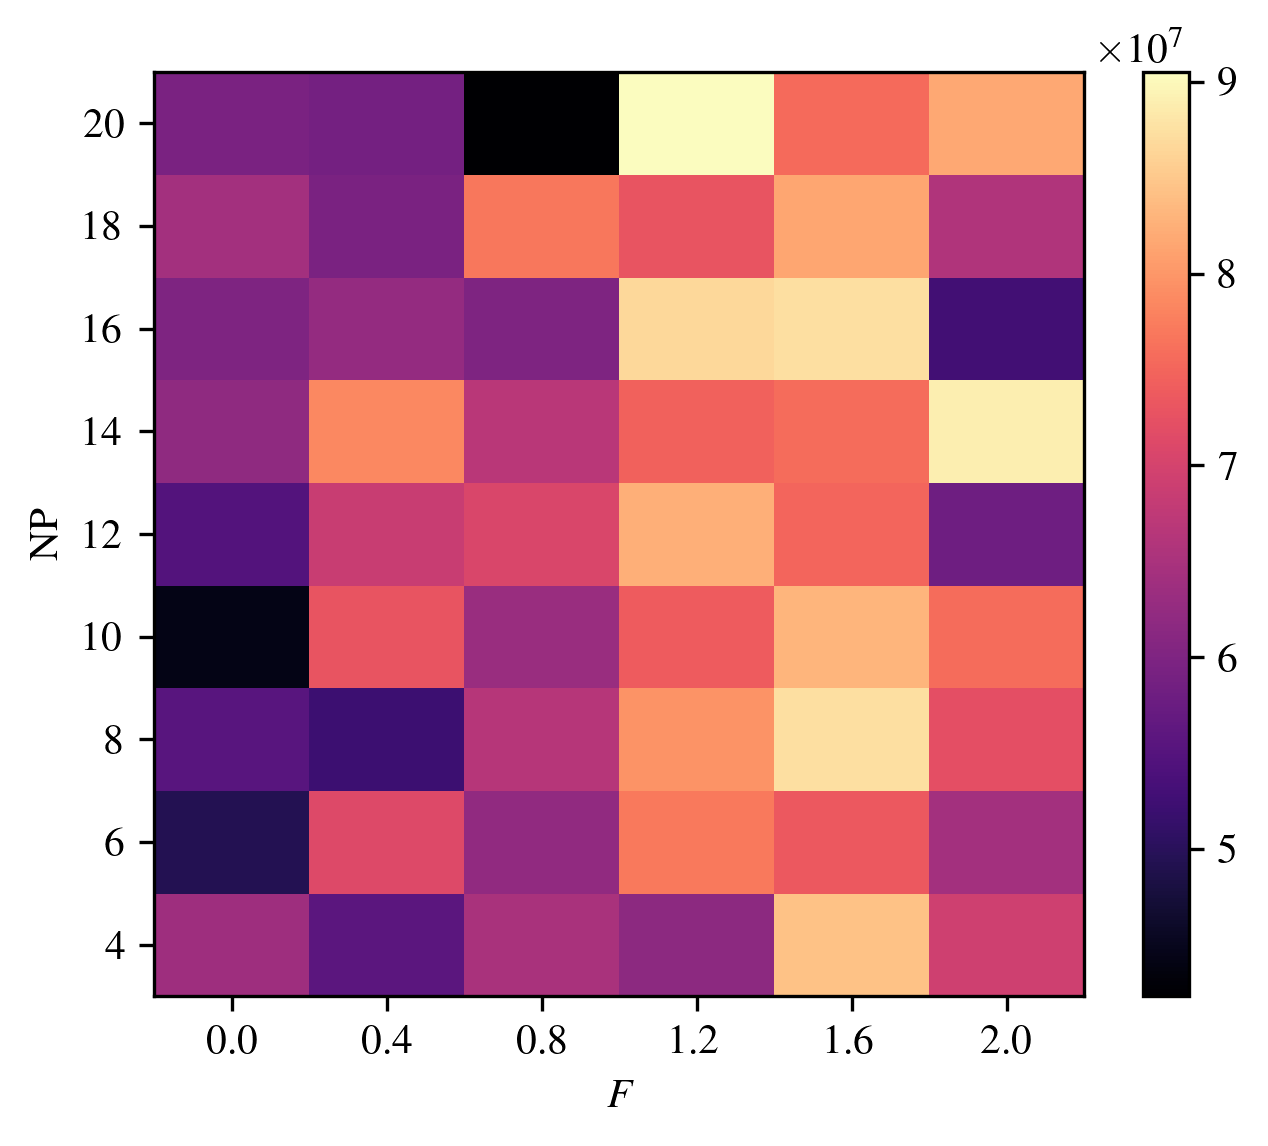

In [10]:
NUM_TRIALS = 6
N_T = 20
DAYS = 50

def plot_profit_grid(k_values, f_values):
    profit = np.array([]).reshape(0, len(f_values))
    for k in k_values:
        profit_row = np.array([])
        for f in f_values:
            f = round(f, 2)
            trial_id = f"ZIP_k={k},F={f}"
            avg_balance = 0
            for i in range(NUM_TRIALS):
                prices_fname = f"results/prde_zip_nt{N_T}_{DAYS}d/{i + 1}/" + trial_id + '_avg_balance.csv'
                with open(prices_fname, newline='') as csvfile:
                    # print(prices_fname)
                    balance = list(csv.reader(csvfile))[0][6]
                    avg_balance += int(balance)
                    # print(trial_id, balance)
                    # profit_row = np.hstack([profit_row, int(balance)])
            avg_balance /= NUM_TRIALS
            profit_row = np.hstack([profit_row, avg_balance])
        profit = np.vstack([profit, profit_row])

    plt.figure(figsize = (5, 4))
    plt.imshow(profit, cmap = 'magma', origin = "lower", aspect = 'auto')
    plt.xlabel("$F$")
    plt.ylabel("$\mathrm{NP}$")
    plt.gca().set_xticks(np.arange(len(f_values)), labels = f_values)
    plt.gca().set_yticks(np.arange(len(k_values)), labels = k_values)
    plt.colorbar()
    global profit_hetero
    profit_hetero = profit.flatten()
    plt.savefig(f"figures/profit_grid.png", bbox_inches='tight', pad_inches=0.0)
    plt.show()

k_values = [4, 6, 8, 10, 12, 14, 16, 18, 20]
f_values = [0.0, 0.4, 0.8, 1.2, 1.6, 2.0]
plot_profit_grid(k_values, f_values)

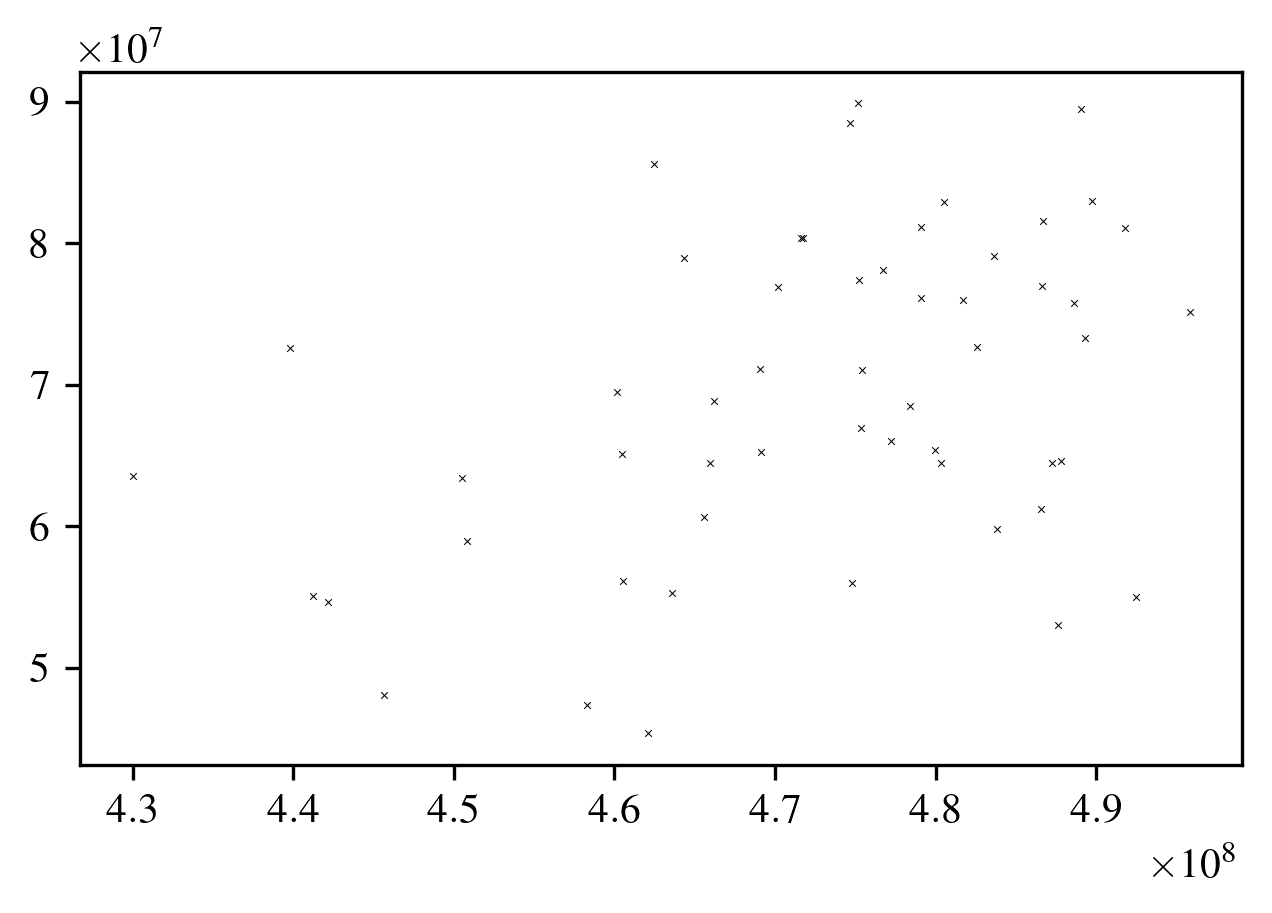

0.16287582950496293


In [9]:
plt.figure(figsize = (5, 3))
plt.scatter(profit_homo, profit_hetero, marker = 'x', s = 2.5, lw = 0.25, c = 'black')
plt.show()
# R Squared
a, b = np.polyfit(profit_homo, profit_hetero, 1)
profit_hetero_hat = a * profit_homo + b
r2 = calc_r_squared(profit_hetero, profit_hetero_hat)
print(r2)

R squared: 0.6921987083549115


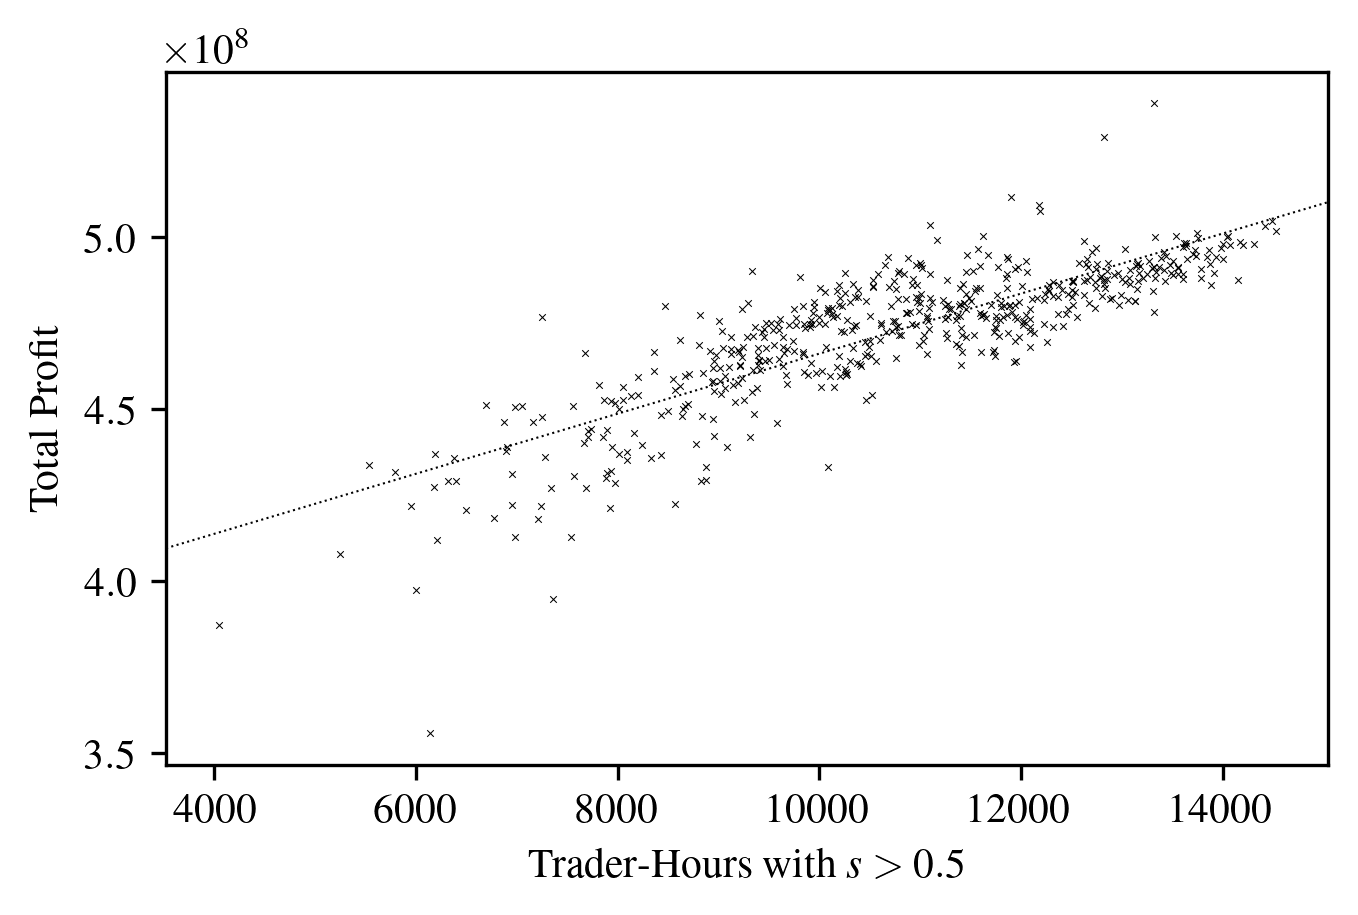

In [67]:
NUM_TRIALS = 10
N_T = 20
DAYS = 50

def plot_strat_prof_scatter(k_values, f_values):
    profit = []
    urgent_hours = []
    for k in k_values:
        for f in f_values:
            f = round(f, 2)
            trial_id = f"k={k},F={f}"
            for i in range(NUM_TRIALS):
                prices_fname = f"results/prde_homogeneous_nt{N_T}_{DAYS}d/{i + 1}/" + trial_id + '_avg_balance.csv'
                with open(prices_fname, newline='') as csvfile:
                    balance = int(list(csv.reader(csvfile))[0][6])
                    profit.append(balance)
                prices_fname = f"results/prde_homogeneous_nt{N_T}_{DAYS}d/{i + 1}/" + trial_id + '_strats.csv'
                num_urgent_strats = 0
                with open(prices_fname, newline='') as csvfile:
                    reader = csv.reader(csvfile)
                    for row in reader:
                        step = 7
                        if " k=" in row: # Bit hacky
                            step += 4
                        for i in range(2, len(row) - 13, step):
                            num_urgent_strats += int(float(row[i + 4]) > 0.5)
                urgent_hours.append(num_urgent_strats)

    urgent_hours = np.array(urgent_hours) # x
    profit = np.array(profit) # y
    a, b = np.polyfit(urgent_hours, profit, 1)

    y_hat = a * urgent_hours + b

    r_squared = calc_r_squared(profit, y_hat)
    print("R squared:", r_squared)

    plt.figure(figsize = (5, 3))
    plt.scatter(urgent_hours, profit, marker = 'x', s = 2.5, lw = 0.25, c = 'black')
    x_min = min(urgent_hours) - (max(urgent_hours) - min(urgent_hours)) / 20
    x_max = max(urgent_hours) + (max(urgent_hours) - min(urgent_hours)) / 20
    plt.plot([x_min, x_max], [a * x_min + b, a * x_max + b], linewidth = 0.5, linestyle = ":", c = "black")
    plt.xlim(x_min, x_max)
    plt.xlabel("Trader-Hours with $s>0.5$")
    plt.ylabel("Total Profit")
    plt.savefig(f"figures/strategy_profit.png", bbox_inches='tight', pad_inches=0.0)
    plt.show()

k_values = [4, 6, 8, 10, 12, 14, 16, 18, 20]
f_values = [0.0, 0.4, 0.8, 1.2, 1.6, 2.0]
plot_strat_prof_scatter(k_values, f_values)

R squared: 0.6698329430687042


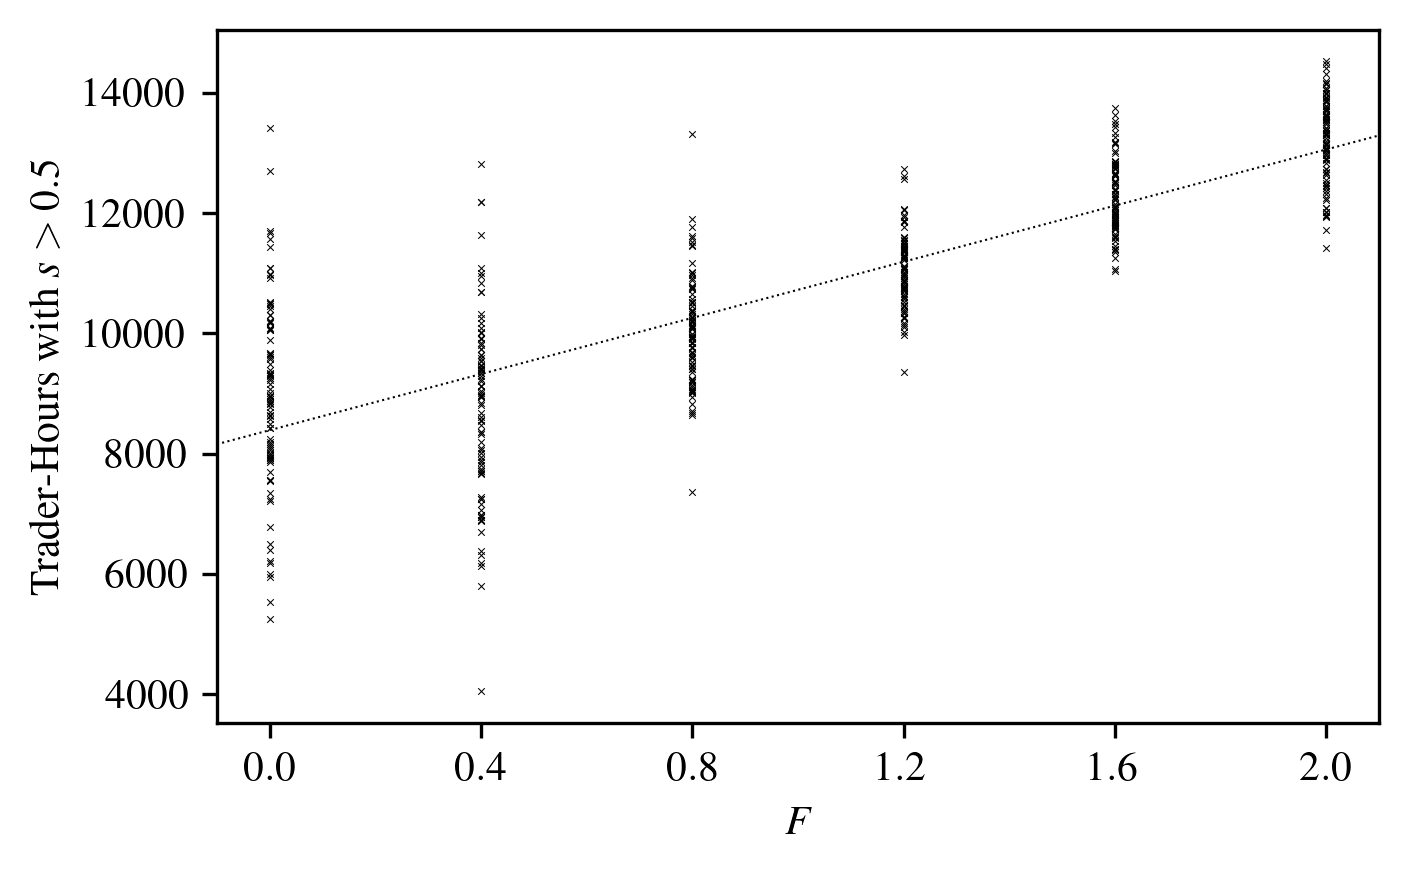

In [68]:
NUM_TRIALS = 10
N_T = 20
DAYS = 50

def plot_strat_f_scatter(k_values, f_values):
    urgent_hours = []
    for k in k_values:
        for f in f_values:
            f = round(f, 2)
            trial_id = f"k={k},F={f}"
            for i in range(NUM_TRIALS):
                prices_fname = f"results/prde_homogeneous_nt{N_T}_{DAYS}d/{i + 1}/" + trial_id + '_strats.csv'
                num_urgent_strats = 0
                with open(prices_fname, newline='') as csvfile:
                    reader = csv.reader(csvfile)
                    for row in reader:
                        step = 7
                        if " k=" in row: # Bit hacky
                            step += 4
                        for i in range(2, len(row) - 13, step):
                            num_urgent_strats += int(float(row[i + 4]) > 0.5)
                urgent_hours.append(num_urgent_strats)

    urgent_hours = np.array(urgent_hours) # x
    f_values_repeat = np.array(f_values * len(k_values))
    f_values_repeat = np.repeat(f_values_repeat, NUM_TRIALS)
    # print(f_values_repeat)
    a, b = np.polyfit(f_values_repeat, urgent_hours, 1)
    
    y_hat = a * f_values_repeat + b

    r_squared = calc_r_squared(urgent_hours, y_hat)
    print("R squared:", r_squared)

    plt.figure(figsize = (5, 3))
    plt.scatter(f_values_repeat, urgent_hours, marker = 'x', s = 2.5, lw = 0.25, c = 'black')
    x_min = min(f_values) - (max(f_values) - min(f_values)) / 20
    x_max = max(f_values) + (max(f_values) - min(f_values)) / 20
    plt.plot([x_min, x_max], [a * x_min + b, a * x_max + b], linewidth = 0.5, linestyle = ":", c = "black")
    plt.xlim(x_min, x_max)
    plt.xlabel("$F$")
    plt.xticks([0, 0.4, 0.8, 1.2, 1.6, 2.0])
    plt.ylabel("Trader-Hours with $s>0.5$")
    plt.savefig(f"figures/F_strats.png", bbox_inches='tight', pad_inches=0.01)
    plt.show()

k_values = [4, 6, 8, 10, 12, 14, 16, 18, 20]
f_values = [0.0, 0.4, 0.8, 1.2, 1.6, 2.0]
plot_strat_f_scatter(k_values, f_values)

R squared: 0.37521641003010986


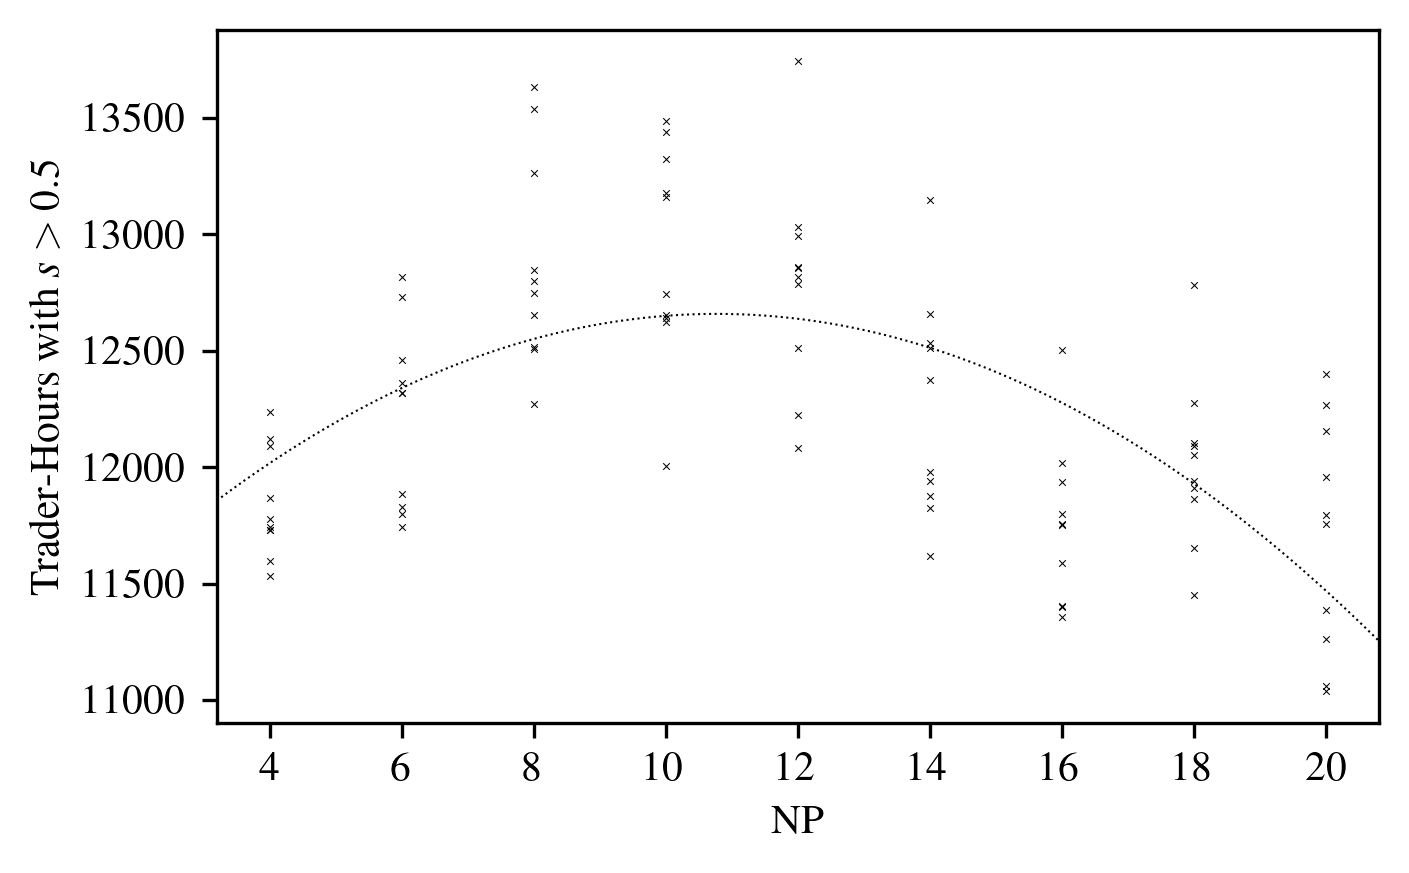

In [73]:
NUM_TRIALS = 10
N_T = 20
DAYS = 50

def plot_strat_k_scatter(k_values, f):
    urgent_hours = []
    for k in k_values:
        f = round(f, 2)
        trial_id = f"k={k},F={f}"
        for i in range(NUM_TRIALS):
            prices_fname = f"results/prde_homogeneous_nt{N_T}_{DAYS}d/{i + 1}/" + trial_id + '_strats.csv'
            num_urgent_strats = 0
            with open(prices_fname, newline='') as csvfile:
                reader = csv.reader(csvfile)
                for row in reader:
                    step = 7
                    if " k=" in row: # Bit hacky
                        step += 4
                    for i in range(2, len(row) - 13, step):
                        num_urgent_strats += int(float(row[i + 4]) > 0.5)
            urgent_hours.append(num_urgent_strats)

    urgent_hours = np.array(urgent_hours) # x
    k_values = np.array(k_values)
    k_values = np.repeat(k_values, NUM_TRIALS)

    a, b, c = np.polyfit(k_values, urgent_hours, 2)
    
    y_hat = a * k_values ** 2 + b * k_values + c

    r_squared = calc_r_squared(urgent_hours, y_hat)
    print("R squared:", r_squared)

    plt.figure(figsize = (5, 3))
    plt.scatter(k_values, urgent_hours, marker = 'x', s = 2.5, lw = 0.25, c = 'black')
    x_min = min(k_values) - (max(k_values) - min(k_values)) / 20
    x_max = max(k_values) + (max(k_values) - min(k_values)) / 20
    
    x_values = np.linspace(min(k_values) - (max(k_values) - min(k_values)) / 20, max(k_values) + (max(k_values) - min(k_values)) / 20, 1000)
    y_values = a * x_values ** 2 + b * x_values + c

    plt.plot(x_values, y_values, linewidth = 0.5, linestyle = ":", c = "black")
    plt.xlim(x_min, x_max)
    plt.xlabel("$\mathrm{NP}$")
    plt.ylabel("Trader-Hours with $s>0.5$")
    plt.savefig(f"figures/f={f}_strats.png", bbox_inches='tight', pad_inches=0.01)
    plt.show()

k_values = [4, 6, 8, 10, 12, 14, 16, 18, 20]
plot_strat_k_scatter(k_values, 1.6)